<a href="https://colab.research.google.com/github/JebaMercy14/Simplilearn-ML-course-Assignment/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement: 
The Advertising dataset captures sales revenue generated with respect to advertisement spends
across multiple channels like radio, tv, and newspaper.

# Objective:
Build a linear regression model to:
- Interpret the coefficients of the model
- Make predictions
- Find and analyze model residuals
- Evaluate model efficiency using RMSE and R-Square values

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Dataset

In [17]:
df=pd.read_csv('/content/sample_data/california_housing_test.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [18]:
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


# Creating train and test dataset

In [25]:
from sklearn import model_selection

In [26]:
x_train = df.drop(['median_house_value'], axis=1)
y_train = df['median_house_value']
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x_train,y_train,test_size=0.3,random_state=42)

# Model Building

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs = -1)
model.fit(xtrain,ytrain)
print(model.intercept_)
print(model.coef_)
print(df.columns.values.tolist())
list(zip(df.columns,model.coef_))

-3592299.463817424
[-4.26755569e+04 -4.20903325e+04  1.21296557e+03 -8.43396563e+00
  9.37205808e+01 -3.76716345e+01  6.48950732e+01  4.00877065e+04]
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


[('longitude', -42675.55685415956),
 ('latitude', -42090.33251368851),
 ('housing_median_age', 1212.9655706112283),
 ('total_rooms', -8.433965625212295),
 ('total_bedrooms', 93.72058077246948),
 ('population', -37.67163453551984),
 ('households', 64.89507321405381),
 ('median_income', 40087.706475175706)]

# Checking the magnitude of coefficients

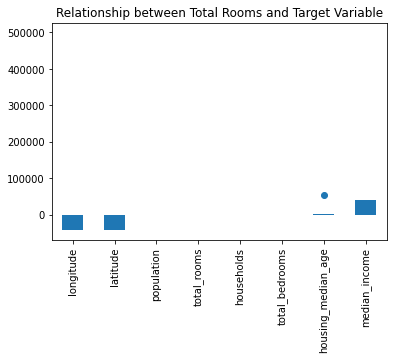

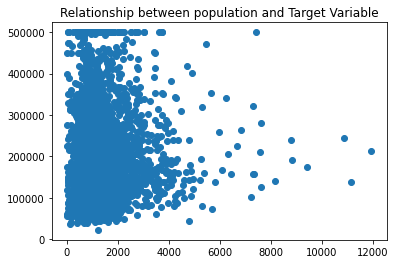

R2 Value/Coefficient of Determination: 0.6058052094817409


In [31]:
predictors = df.columns[:-1]
coef = pd.Series(model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')
plt.scatter(df.total_rooms,df.median_house_value)
plt.title("Relationship between Total Rooms and Target Variable")
plt.show()
plt.scatter(df.population,df.median_house_value)
plt.title("Relationship between population and Target Variable")
plt.show()
print('R2 Value/Coefficient of Determination: {}'.format(model.score(xtest, ytest)))

# Final prediction

In [36]:
import math
from sklearn.metrics import mean_squared_error

69349.032317698
70527.18259234921


,Actual,Predicted
1801,119400.0,125166.942600
1190,133600.0,142639.199025
1817,173600.0,247602.080398
251,218600.0,205872.658039
2505,276700.0,193573.444587
1117,146800.0,173831.374444
1411,166300.0,228539.312958
2113,197200.0,162830.022921
408,162500.0,67733.779811
2579,287800.0,200355.239387


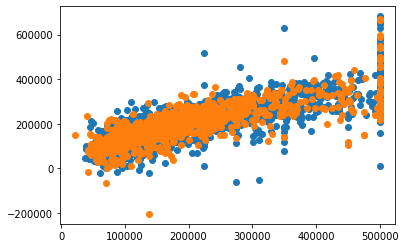

In [37]:
plt.scatter(ytrain,model.predict(xtrain))
print(math.sqrt(mean_squared_error(ytrain, model.predict(xtrain))))
plt.scatter(ytest,model.predict(xtest))
print(math.sqrt(mean_squared_error(ytest, model.predict(xtest))))
pd.DataFrame({'Actual': ytest, 'Predicted': model.predict(xtest)}).head(10)